# Analysis of Presidential Speeches

### Imports and Data collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
ts = pd.read_csv('presidential_speeches.csv')

In [3]:
ts

,title,president,transcript,url
0,"May 31, 2024: Remarks on the Middle East",Joe Biden Presidency,"THE PRESIDENT: Hello, folks. (The President ch...",https://millercenter.org/the-presidency/presid...
1,"March 7, 2024: State of Union Address",Joe Biden Presidency,"Good evening. Good evening. If I were smart, I...",https://millercenter.org/the-presidency/presid...
2,"January 5, 2024: Speech on the Third Anniversa...",Joe Biden Presidency,"THE PRESIDENT: Thank you, thank you, thank you...",https://millercenter.org/the-presidency/presid...
3,"October 20, 2023: Remarks on the US Response i...",Joe Biden Presidency,"Good evening, my fellow Americans. We’re facin...",https://millercenter.org/the-presidency/presid...
4,"February 21, 2023: Remarks on the One-Year Ann...",Joe Biden Presidency,"THE PRESIDENT: Hello, Poland! One of our grea...",https://millercenter.org/the-presidency/presid...
...,...,...,...,...
1045,"December 29, 1790: Talk to the Chiefs and Coun...",George Washington Presidency,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...
1046,"December 8, 1790: Second Annual Message to Con...",George Washington Presidency,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
1047,"January 8, 1790: First Annual Message to Congress",George Washington Presidency,Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
1048,"October 3, 1789: Thanksgiving Proclamation",George Washington Presidency,Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...


### Perform initial cleaning of President names

In [4]:
def clean_president_name(president_label):
    # Remove everything after "Presidency"
    return re.sub(r'\s*Presidency.*$', '', president_label)

# Apply the cleaning function to the president column
ts['president'] = ts['president'].apply(clean_president_name)

In [5]:
len(ts['president'].unique())

45

### Begin EDA

In [6]:
# Calculate the length of each speech
ts['speech_length'] = ts['transcript'].apply(lambda x: len(x.split()))

In [7]:
# EDA: Number of speeches given by each president
speeches_count = ts['president'].value_counts().reset_index()
speeches_count.columns = ['president', 'number_of_speeches']

In [8]:
# EDA: Average length of speeches by each president
avg_speech_length = ts.groupby('president')['speech_length'].mean().reset_index()
avg_speech_length.columns = ['president', 'average_speech_length']

In [11]:
def calculate_average_sentence_length(text):
    # Split the text into sentences based on common sentence-ending punctuation
    sentences = re.split(r'[.!?]', text)
    
    # Filter out empty strings from the sentences list
    sentences = [s.strip() for s in sentences if s.strip()]
    
    # Calculate the total number of words and the number of sentences
    total_words = sum(len(sentence.split()) for sentence in sentences)
    num_sentences = len(sentences)
    
    # Calculate the average sentence length
    if num_sentences == 0:
        return 0
    return total_words / num_sentences

In [18]:
def calculate_average_word_length(text):
    words = text.split()  # Split the text into words
    word_lengths = [len(word) for word in words]  # Get the length of each word
    if len(words) == 0:  # Handle case where there are no words
        return 0
    return sum(word_lengths) / len(words)  # Calculate the average word length

In [ ]:
ts['average_sentence_length'] = ts['transcript'].apply(calculate_average_sentence_length)

In [20]:
ts['average_word_length'] = ts['transcript'].apply(calculate_average_word_length)

In [9]:
# EDA: Summary statistics of speech lengths
summary_stats = ts['speech_length'].describe()

In [10]:
# Display summary statistics
print(summary_stats)

count     1050.000000
mean      3963.289524
std       4170.143145
min        135.000000
25%       1174.250000
50%       2698.500000
75%       4873.500000
max      32994.000000
Name: speech_length, dtype: float64


In [16]:
sentence_length = ts['average_sentence_length'].describe()
sentence_length_by_pres = ts.groupby('president')['average_sentence_length'].describe()

In [15]:
print(sentence_length)

count    1050.000000
mean       28.361653
std        19.795523
min         7.904762
25%        18.345345
50%        23.219176
75%        33.920264
max       382.000000
Name: average_sentence_length, dtype: float64


In [17]:
print(sentence_length_by_pres)

                       count       mean        std        min        25%  \
president                                                                  
Abraham Lincoln         15.0  25.784552   6.372744  16.777778  22.756072   
Andrew Jackson          26.0  48.548321  21.800714  30.551724  39.196250   
Andrew Johnson          31.0  46.534498  34.643829  17.529412  30.853302   
Barack Obama            51.0  17.745957   3.519240  11.333333  14.935877   
Benjamin Harrison       23.0  32.735006  11.544417  15.947368  27.932734   
Bill Clinton            39.0  19.446342   2.570869  14.769912  18.305920   
Calvin Coolidge         12.0  21.630505   2.181222  18.214674  19.564282   
Chester A. Arthur       11.0  30.087999   4.092133  23.627841  27.817757   
Donald Trump            43.0  13.526729   3.002642   7.904762  11.166107   
Dwight D. Eisenhower    15.0  20.535734   2.197229  16.865979  18.874471   
Franklin D. Roosevelt   49.0  22.635403   2.827775  17.375000  21.100000   
Franklin Pie

In [21]:
word_length = ts['average_word_length'].describe()
word_length_by_pres = ts.groupby('president')['average_word_length'].describe()

In [22]:
print(word_length)
print(word_length_by_pres)

count    1050.000000
mean        4.850180
std         0.221518
min         3.951807
25%         4.710964
50%         4.854801
75%         4.995729
max         5.698276
Name: average_word_length, dtype: float64
                       count      mean       std       min       25%  \
president                                                              
Abraham Lincoln         15.0  4.780508  0.223605  4.324503  4.642847   
Andrew Jackson          26.0  4.913300  0.077619  4.733974  4.865337   
Andrew Johnson          31.0  4.992883  0.217970  4.638760  4.843657   
Barack Obama            51.0  4.698298  0.110154  4.421899  4.630786   
Benjamin Harrison       23.0  4.907916  0.183926  4.606796  4.735967   
Bill Clinton            39.0  4.641257  0.144610  4.211623  4.583993   
Calvin Coolidge         12.0  5.053204  0.131901  4.880299  4.932248   
Chester A. Arthur       11.0  5.030018  0.190603  4.674959  4.928288   
Donald Trump            43.0  4.754345  0.242149  3.951807  4.636812  

### Plotting

/tmp/ipykernel_347224/454063095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_speeches', y='president', data=speeches_count, palette='viridis')


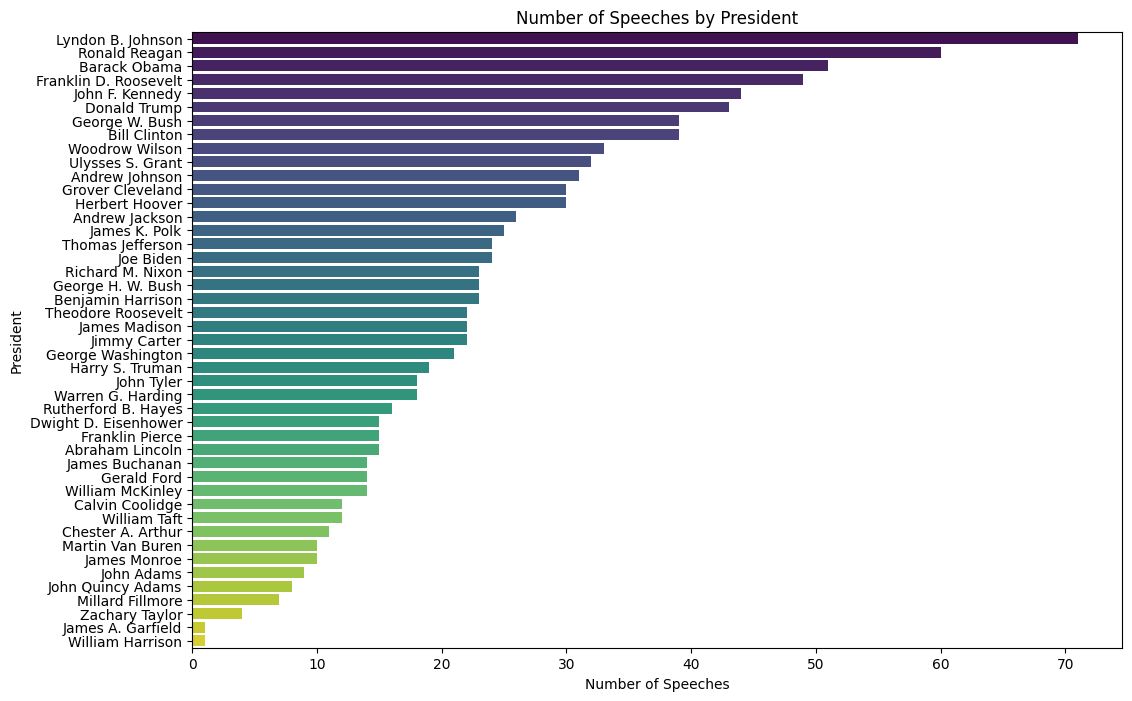

In [12]:
# Plot: Number of speeches by president
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_speeches', y='president', data=speeches_count, palette='viridis')
plt.title('Number of Speeches by President')
plt.xlabel('Number of Speeches')
plt.ylabel('President')
plt.show()

/tmp/ipykernel_347224/4016795522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_speech_length', y='president', data=avg_speech_length, palette='viridis')


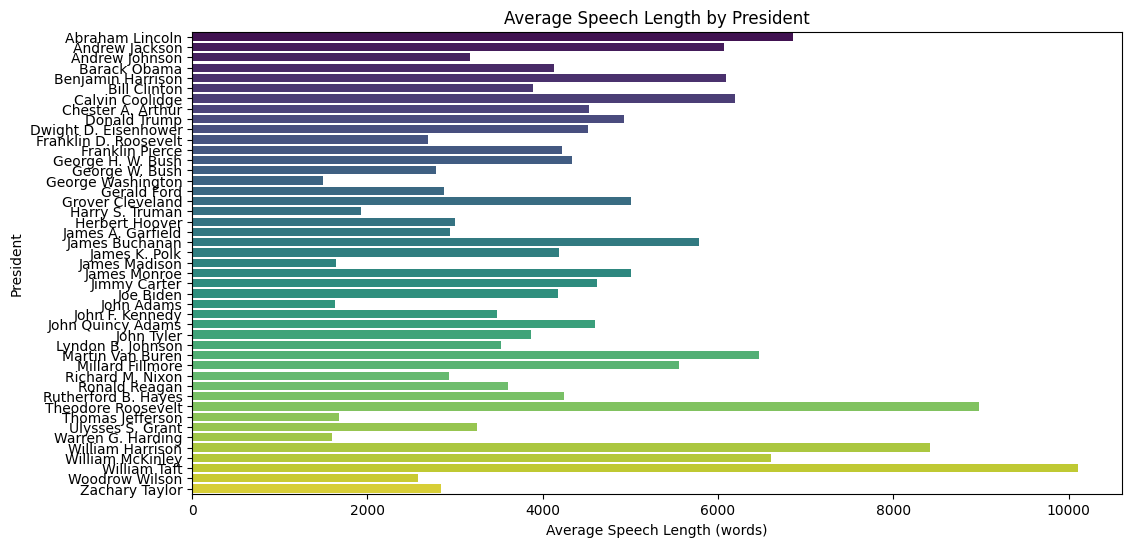

In [13]:
# Plot: Average speech length by president
plt.figure(figsize=(12, 6))
sns.barplot(x='average_speech_length', y='president', data=avg_speech_length, palette='viridis')
plt.title('Average Speech Length by President')
plt.xlabel('Average Speech Length (words)')
plt.ylabel('President')
plt.show()

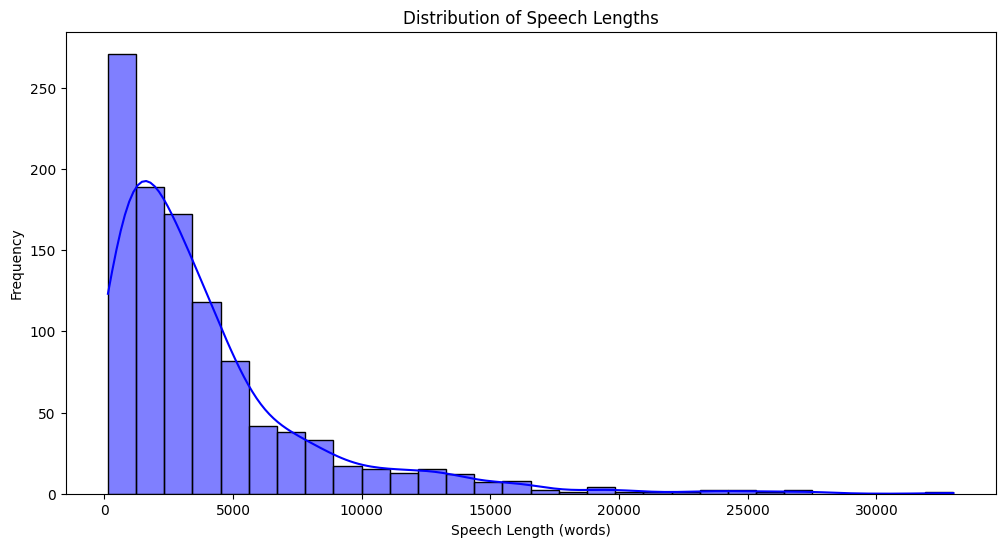

In [14]:
# Plot: Distribution of speech lengths
plt.figure(figsize=(12, 6))
sns.histplot(ts['speech_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length (words)')
plt.ylabel('Frequency')
plt.show()

### Save the cleaned data and EDA results to CSV files

In [16]:
ts.to_csv('cleaned_presidential_speeches.csv', index=False)
speeches_count.to_csv('presidential_speeches_count.csv', index=False)
avg_speech_length.to_csv('presidential_speeches_avg_length.csv', index=False)